In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the file

df = pd.read_csv(r'C:\Users\Oiendrila\Documents\UpGrad\Logistic regression case study\Lead+Scoring+Case+Study\Leads.csv')

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Checking the structure of the file

df.shape

(9240, 37)

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Cleaning

In [7]:
# Checking duplicates

df.duplicated().sum()

0

- No duplicate values found.
- Prospect ID and Lead Number are unique identifiers. So, we will drop Prospect ID.
- Some categorical columns have "Select" levels present. These are basically null values and should be replaced with NaN.

In [8]:
# Dropping 'Prospect ID' column

df.drop('Prospect ID', axis=1, inplace=True)

In [9]:
# Converting "Select" values to NaN

df = df.replace('Select', np.nan)

In [10]:
# Checking null value percentage in each column

round(100*(df.isnull().sum()/len(df.index)),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [11]:
# Dropping columns having more than 40% missing values

df.drop(['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 
        'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1, inplace=True)

In [12]:
# Further checking the null value percentage

round(100*(df.isnull().sum()/len(df.index)),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

- Some columns have high null values. But some of these are important columns. So, we will look at them individually.

In [13]:
# Checking skewness in the 'What matters most to you in choosing a course' column

df['What matters most to you in choosing a course'].value_counts(normalize=True, dropna=False) *100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

- Since the data is heavily skewed (Better Career Prospects+NaN = 99%), we can drop this column

In [14]:
# Dropping 'What matters most to you in choosing a course' column

df.drop('What matters most to you in choosing a course', axis=1, inplace=True)

In [15]:
# Checking skewness in the 'Country' column

df['Country'].value_counts(normalize=True, dropna=False) *100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Germany                  0.043290
Canada                   0.043290
Nigeria                  0.043290
South Africa             0.043290
Kuwait                   0.043290
Sweden                   0.032468
Uganda                   0.021645
Philippines              0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
Ghana                    0.021645
Italy                    0.021645
China                    0.021645
Belgium                  0.021645
Bangladesh               0.021645
Vietnam       

- Since the data is heavily skewed (India+NaN = 97%), we can drop this column

In [16]:
# Dropping 'Country' column

df.drop('Country', axis=1, inplace=True)

In [17]:
# Checking skewness in the 'City' column

df['City'].value_counts(normalize=True, dropna=False) *100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [18]:
# Imputing NaN values with 'Others'

df.City = df['City'].replace(np.nan, 'Others')

# Merging the lower value categories to 'Others'

df.City = df['City'].replace(['Other Cities', 'Other Cities of Maharashtra', 'Other Metro Cities', 'Tier II Cities'], 'Others')

In [19]:
df['City'].value_counts(normalize=True, dropna=False) *100

Others               56.991342
Mumbai               34.870130
Thane & Outskirts     8.138528
Name: City, dtype: float64

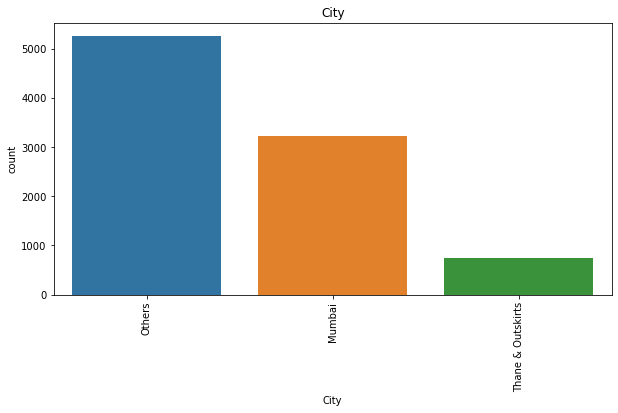

In [20]:
# Plotting the distribution of data in the 'City' column

plt.figure(figsize=(10, 5))
sns.countplot(df.City)
plt.xticks(rotation=90)
plt.title('City')
plt.show()

In [21]:
# Checking skewness in the 'Tags' column

df['Tags'].value_counts(normalize=True, dropna=False) *100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

In [22]:
# Imputing NaN values with 'Others'

df.Tags = df['Tags'].replace(np.nan, 'Others')

# Merging the lower value categories to 'Others'

df.Tags = df['Tags'].replace(['Closed by Horizzon', 'switched off', 'Busy', 'Lost to EINS', 'Not doing further education',
                             'Interested  in full time MBA', 'Graduation in progress', 'invalid number',
                             'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup', 'number not provided',
                             'in touch with EINS', 'Lost to Others', 'Still Thinking', 
                              'Want to take admission but has financial problems', 'Interested in Next batch',
                              'In confusion whether part time or DLP', 'Lateral student', 'University not recognized',
                             'Shall take in the next coming month', 'Recognition issue (DEC approval)'], 'Others')

In [23]:
df['Tags'].value_counts(normalize=True, dropna=False) *100

Others                                 53.971861
Will revert after reading the email    22.424242
Ringing                                13.019481
Interested in other courses             5.551948
Already a student                       5.032468
Name: Tags, dtype: float64

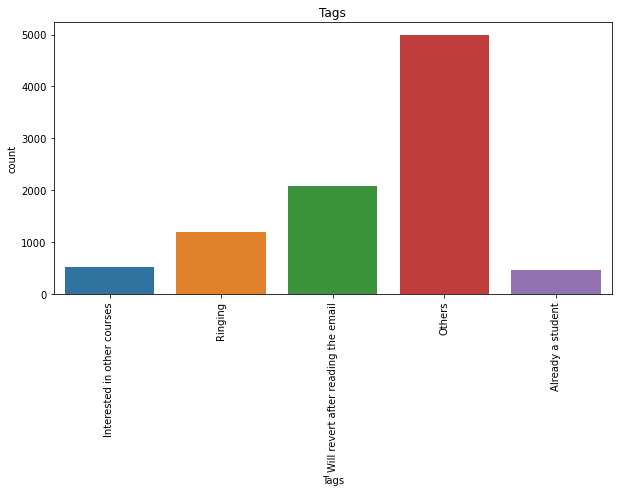

In [24]:
# Plotting the distribution of data in the 'Tags' column

plt.figure(figsize=(10, 5))
sns.countplot(df.Tags)
plt.xticks(rotation=90)
plt.title('Tags')
plt.show()

In [25]:
# Checking skewness in the 'Specialization' column

df['Specialization'].value_counts(normalize=True, dropna=False) *100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [26]:
# Imputing NaN values with 'Others'

df.Specialization = df['Specialization'].replace(np.nan, 'Others')

# Merging the lower value categories to 'Others'

df.Specialization = df['Specialization'].replace(['Rural and Agribusiness', 'E-Business', 'Services Excellence'], 'Others')

In [27]:
df['Specialization'].value_counts(normalize=True, dropna=False) *100

Others                               38.419913
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Name: Specialization, dtype: float64

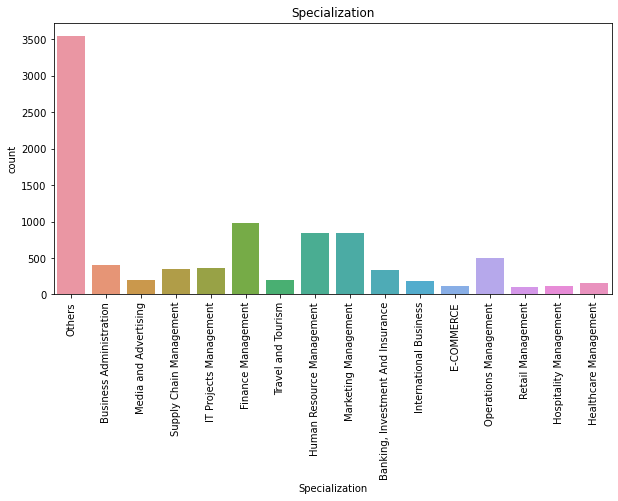

In [28]:
# Plotting the distribution of data in the 'Specialization' column

plt.figure(figsize=(10, 5))
sns.countplot(df.Specialization)
plt.xticks(rotation=90)
plt.title('Specialization')
plt.show()

In [29]:
# Checking skewness in the 'What is your current occupation' column

df['What is your current occupation'].value_counts(normalize=True, dropna=False) *100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [30]:
# Imputing NaN values with 'Others'

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Others')

# Merging the lower value categories to 'Others'

df['What is your current occupation'] = df['What is your current occupation'].replace(['Other','Housewife',
                                                                                        'Businessman'], 'Others')

In [31]:
df['What is your current occupation'].value_counts(normalize=True, dropna=False) *100

Unemployed              60.606061
Others                  29.480519
Working Professional     7.640693
Student                  2.272727
Name: What is your current occupation, dtype: float64

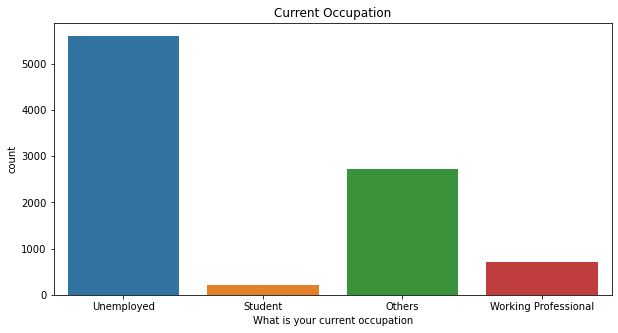

In [32]:
# Plotting the distribution of data in the 'What is your current occupation' column

plt.figure(figsize=(10, 5))
sns.countplot(df['What is your current occupation'])
plt.title('Current Occupation')
plt.show()

In [33]:
# Further checking the null value percentage

round(100*(df.isnull().sum()/len(df.index)),2)

Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                

- 'Last Activity' has 1.11% NaN values. So, these values have to be imputed.
- 'Lead Source' has 0.39% NaN values. These NaN values also have to be imputed.

In [34]:
# Checking the 'Last Activity' column

df['Last Activity'].value_counts(normalize=True, dropna=False) *100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Marked Spam                0.021645
Email Received                   0.021645
Resubscribed to emails           0.010823
Visited Booth in Tradeshow       0.010823
Name: Last Activity, dtype: float64

In [35]:
# Imputing NaN values with 'Others'

df['Last Activity'] = df['Last Activity'].replace(np.nan, 'Others')

# Merging the lower value categories to 'Others'

df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed', 'Had a Phone Conversation',
                                                   'Approached upfront', 'View in browser link Clicked',
                                                   'Email Received', 'Email Marked Spam', 'Visited Booth in Tradeshow',
                                                   'Resubscribed to emails'], 'Others')

In [36]:
df['Last Activity'].value_counts(normalize=True, dropna=False) *100

Email Opened                 37.196970
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Others                        3.333333
Email Link Clicked            2.889610
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

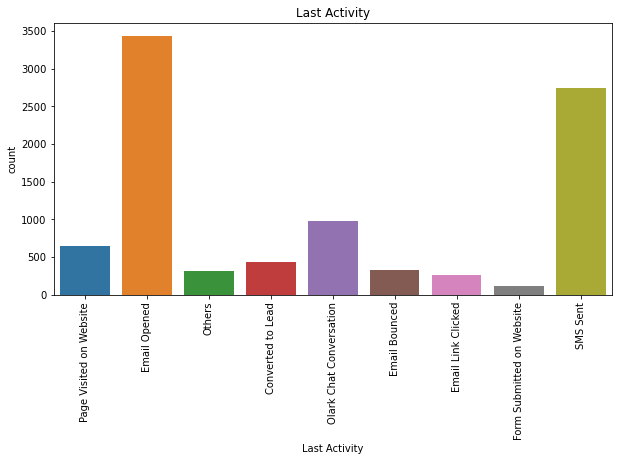

In [37]:
# Plotting the distribution of data in the 'Last Activity' column

plt.figure(figsize=(10, 5))
sns.countplot(df['Last Activity'])
plt.xticks(rotation=90)
plt.title('Last Activity')
plt.show()

In [38]:
# Checking the 'Lead Source' column

df['Lead Source'].value_counts(normalize=True, dropna=False) *100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Live Chat             0.021645
Social Media          0.021645
Press_Release         0.021645
Pay per Click Ads     0.010823
youtubechannel        0.010823
NC_EDM                0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
testone               0.010823
Name: Lead Source, dtype: float64

In [39]:
# Imputing NaN values with 'Others'

df['Lead Source'] = df['Lead Source'].replace(np.nan, 'Others')

# Merging the lower value categories to 'Others'

df['Lead Source'] = df['Lead Source'].replace(['Facebook','bing', 'google', 'Click2call', 'Live Chat', 'Social Media',
                                                   'Press_Release', 'testone', 'welearnblog_Home', 'NC_EDM', 
                                                   'youtubechannel', 'WeLearn', 'Pay per Click Ads', 'blog'], 'Others')

In [40]:
df['Lead Source'].value_counts(normalize=True, dropna=False) *100

Google              31.038961
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Others               1.287879
Name: Lead Source, dtype: float64

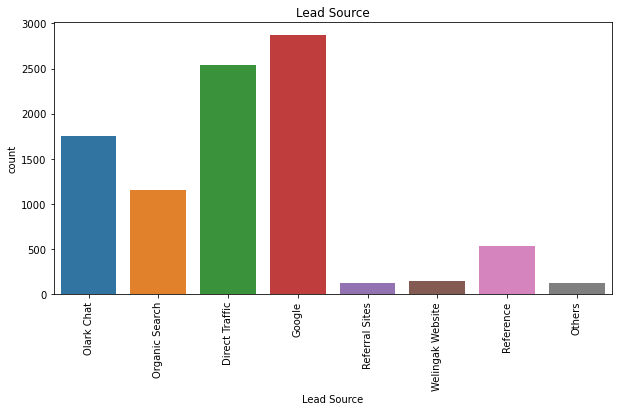

In [41]:
# Plotting the distribution of data in the 'Lead Source' column

plt.figure(figsize=(10, 5))
sns.countplot(df['Lead Source'])
plt.xticks(rotation=90)
plt.title('Lead Source')
plt.show()

In [42]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


- 'TotalVisits' and 'Page Views Per Visit' are numerical columns with less than 2% missing values. Also the variation in data is less.

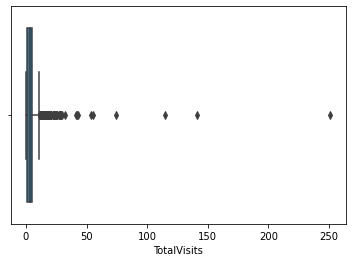

In [43]:
sns.boxplot(df['TotalVisits'])
plt.show()

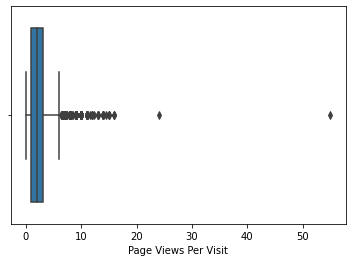

In [44]:
sns.boxplot(df['Page Views Per Visit'])
plt.show()

In [45]:
# Substituting the missing values with medians since the boxplots show outliers in the data

df['TotalVisits'].fillna(df['TotalVisits'].median(), inplace=True)
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(), inplace=True)

In [46]:
# Finally checking the null value percentage

round(100*(df.isnull().sum()/len(df.index)),2)

Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

- There is no missing value in the data now.

In [47]:
df.shape

(9240, 27)

In [48]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Data Preparation

### Explanatory Data Analysis

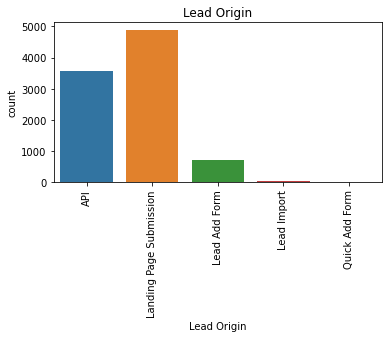

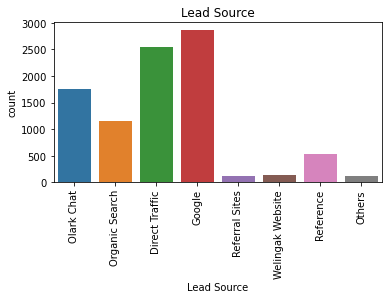

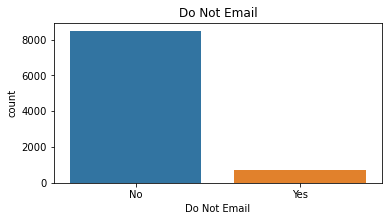

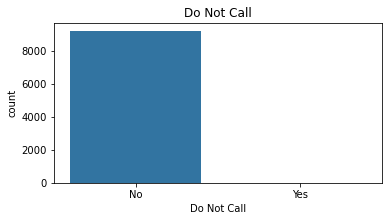

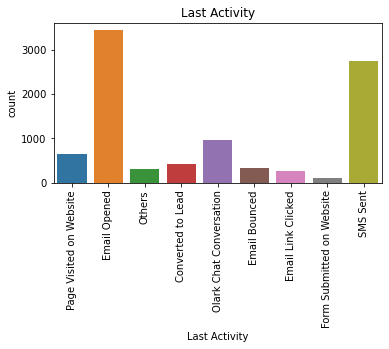

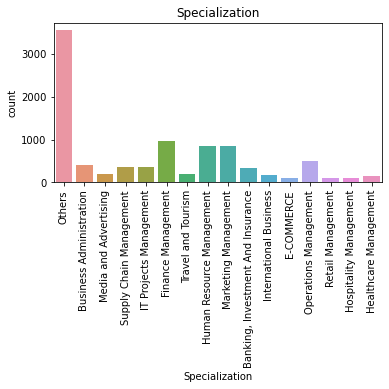

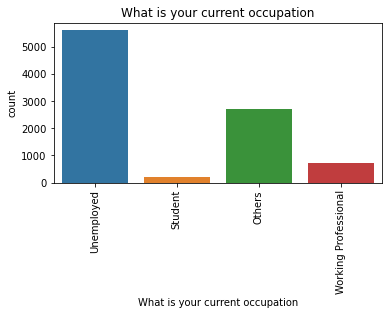

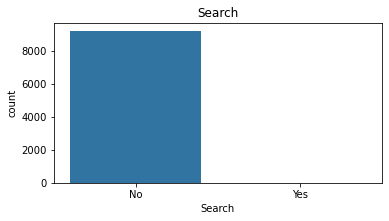

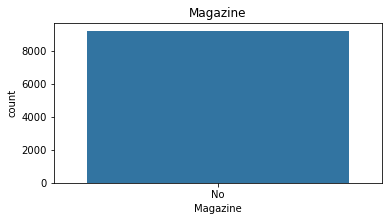

In [49]:
# Univariate analysis of categorical columns

plt.figure(figsize=(20, 10))
plt.subplot(3,3,1)
sns.countplot(df['Lead Origin'])
plt.xticks(rotation=90)
plt.title('Lead Origin')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(3,3,2)
sns.countplot(df['Lead Source'])
plt.xticks(rotation=90)
plt.title('Lead Source')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(3,3,3)
sns.countplot(df['Do Not Email'])
plt.title('Do Not Email')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(3,3,4)
sns.countplot(df['Do Not Call'])
plt.title('Do Not Call')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(3,3,5)
sns.countplot(df['Last Activity'])
plt.xticks(rotation=90)
plt.title('Last Activity')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(3,3,6)
sns.countplot(df['Specialization'])
plt.xticks(rotation=90)
plt.title('Specialization')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(3,3,7)
sns.countplot(df['What is your current occupation'])
plt.xticks(rotation=90)
plt.title('What is your current occupation')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(3,3,8)
sns.countplot(df['Search'])
plt.title('Search')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(3,3,9)
sns.countplot(df['Magazine'])
plt.title('Magazine')
plt.show()

- Most entries in the 'Do Not Call', 'Search' and 'Magazine' are 'No'. So, these columns are not adding any further information to the model and can be dropped for further analysis.

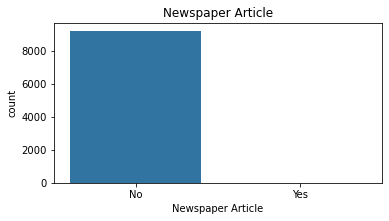

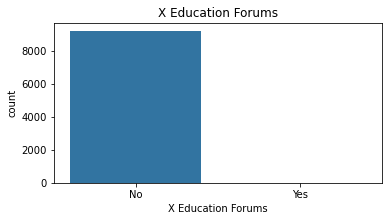

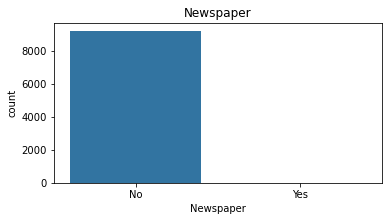

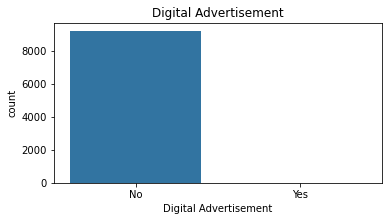

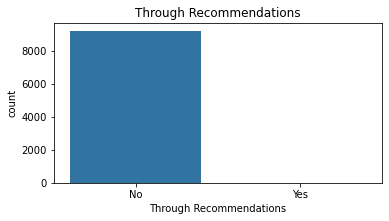

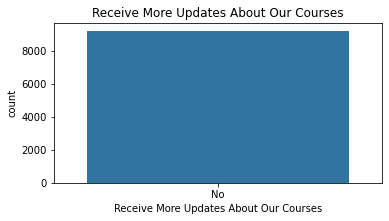

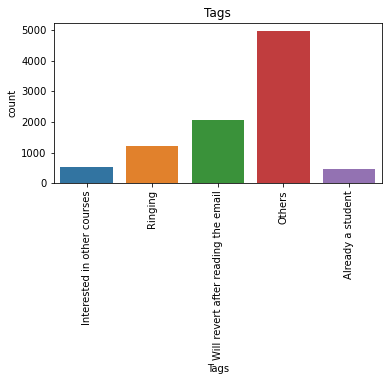

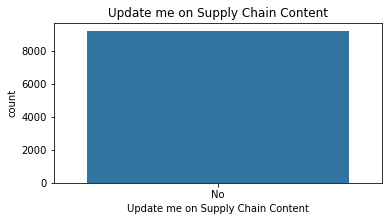

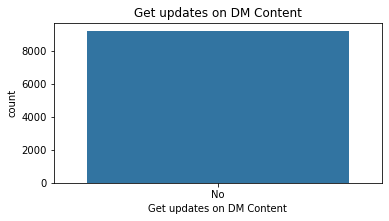

In [50]:
# Univariate analysis of categorical columns

plt.figure(figsize=(20, 10))
plt.subplot(3,3,1)
sns.countplot(df['Newspaper Article'])
plt.title('Newspaper Article')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(3,3,2)
sns.countplot(df['X Education Forums'])
plt.title('X Education Forums')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(3,3,3)
sns.countplot(df['Newspaper'])
plt.title('Newspaper')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(3,3,4)
sns.countplot(df['Digital Advertisement'])
plt.title('Digital Advertisement')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(3,3,5)
sns.countplot(df['Through Recommendations'])
plt.title('Through Recommendations')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(3,3,6)
sns.countplot(df['Receive More Updates About Our Courses'])
plt.title('Receive More Updates About Our Courses')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(3,3,7)
sns.countplot(df['Tags'])
plt.xticks(rotation=90)
plt.title('Tags')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(3,3,8)
sns.countplot(df['Update me on Supply Chain Content'])
plt.title('Update me on Supply Chain Content')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(3,3,9)
sns.countplot(df['Get updates on DM Content'])
plt.title('Get updates on DM Content')
plt.show()

- Most entries in the 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content' and 'Get updates on DM Content' are 'No'. So, these columns are not adding any further information to the model and can be dropped for further analysis.

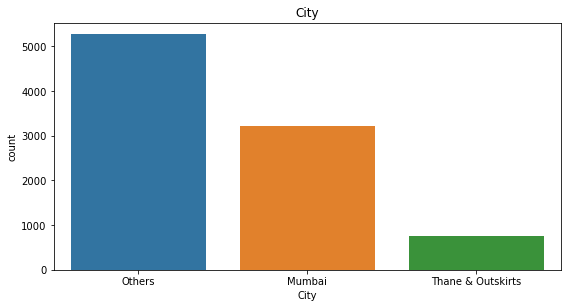

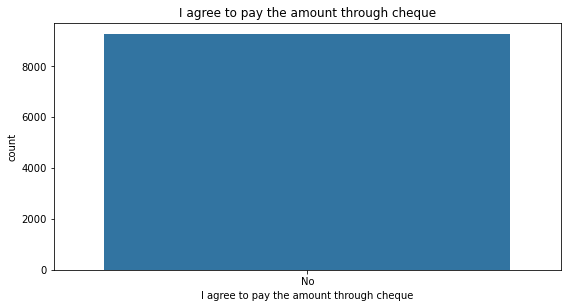

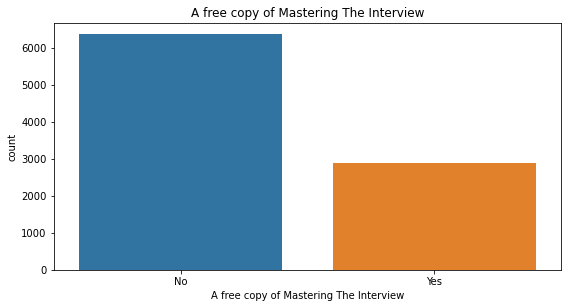

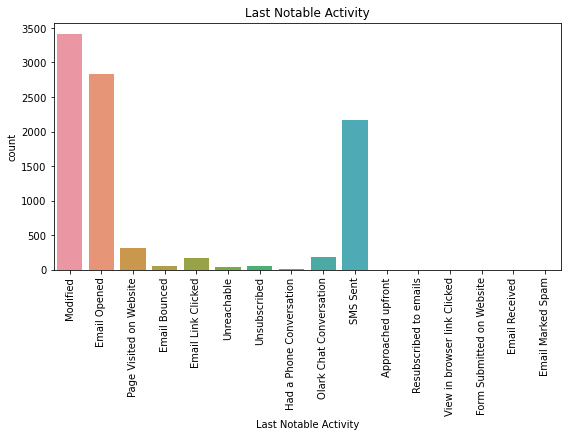

In [51]:
# Univariate analysis of remaining categorical columns

plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
sns.countplot(df['City'])
plt.title('City')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(2,2,2)
sns.countplot(df['I agree to pay the amount through cheque'])
plt.title('I agree to pay the amount through cheque')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(2,2,3)
sns.countplot(df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(2,2,4)
sns.countplot(df['Last Notable Activity'])
plt.xticks(rotation=90)
plt.title('Last Notable Activity')
plt.show()

- Most entries in the 'I agree to pay the amount through cheque' are 'No'. So, this column is not adding any further information to the model and can be dropped for further analysis.

In [52]:
df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
         'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
         'Get updates on DM Content', 'I agree to pay the amount through cheque'],axis=1, inplace=True)

In [53]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [54]:
df.shape

(9240, 15)

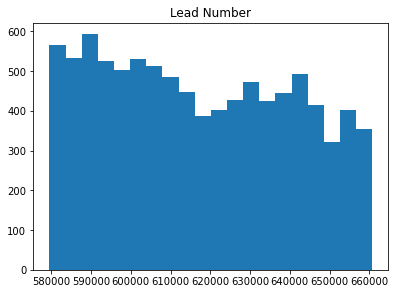

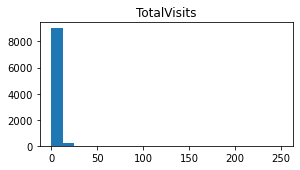

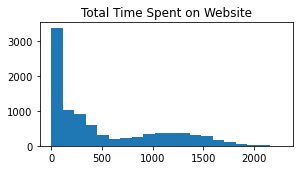

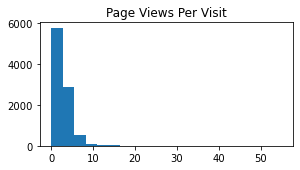

In [55]:
# Plotting the histograms for the numerical columns

plt.figure(figsize=(14, 10))
plt.subplot(2,2,1)
plt.hist(df['Lead Number'], bins=20)
plt.title('Lead Number')
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(2,2,2)
plt.hist(df['TotalVisits'], bins=20)
plt.title('TotalVisits')
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(2,2,3)
plt.hist(df['Total Time Spent on Website'], bins=20)
plt.title('Total Time Spent on Website')
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(2,2,2)
plt.hist(df['Page Views Per Visit'], bins=20)
plt.title('Page Views Per Visit')
plt.show()

- The data seems to have high peaks and appears skewed. Next we have to check for outliers.

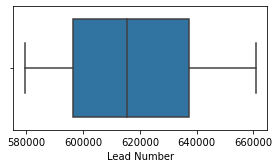

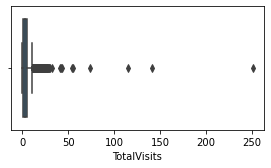

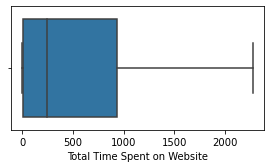

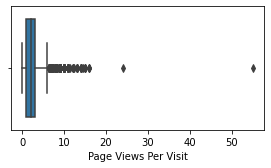

In [56]:
# Univariate analysis of numerical columns

plt.figure(figsize=(10, 5))
plt.subplot(2,2,1)
sns.boxplot(df['Lead Number'])
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(2,2,2)
sns.boxplot(df['TotalVisits'])
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(2,2,3)
sns.boxplot(df['Total Time Spent on Website'])
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(2,2,2)
sns.boxplot(df['Page Views Per Visit'])
plt.show()

- There are outliers in the 'TotalVisits' and 'Page Views Per Visit' data.

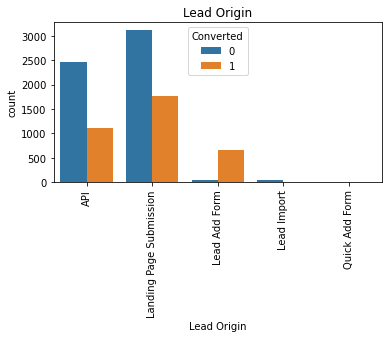

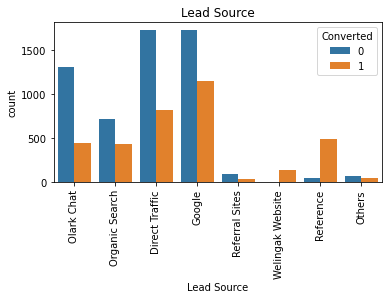

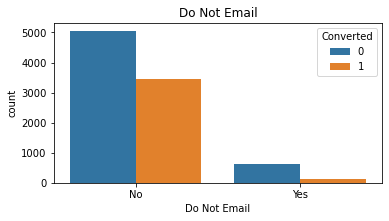

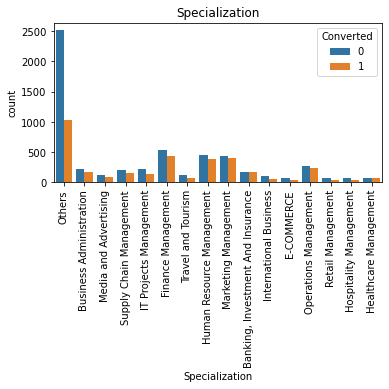

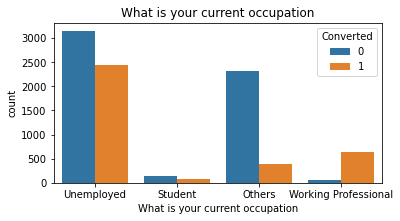

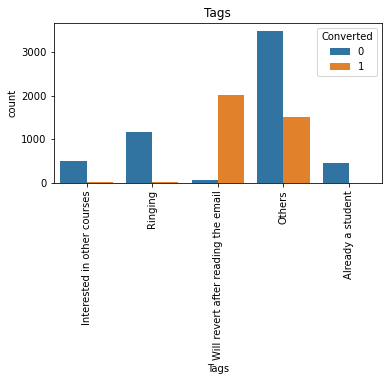

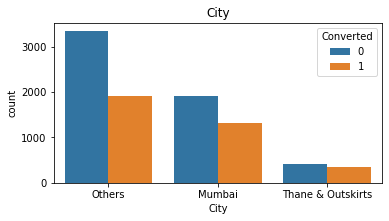

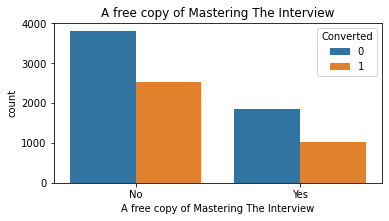

In [57]:
# Bivariate analysis of categorical columns

plt.figure(figsize=(20, 10))
plt.subplot(3,3,1)
sns.countplot(x='Lead Origin', hue='Converted', data=df)
plt.xticks(rotation=90)
plt.title('Lead Origin')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(3,3,2)
sns.countplot(x='Lead Source', hue='Converted', data=df)
plt.xticks(rotation=90)
plt.title('Lead Source')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(3,3,3)
sns.countplot(x='Do Not Email', hue='Converted', data=df)
plt.title('Do Not Email')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(3,3,4)
sns.countplot(x='Specialization', hue='Converted', data=df)
plt.xticks(rotation=90)
plt.title('Specialization')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(3,3,5)
sns.countplot(x='What is your current occupation', hue='Converted', data=df)
plt.title('What is your current occupation')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(3,3,6)
sns.countplot(x='Tags', hue='Converted', data=df)
plt.xticks(rotation=90)
plt.title('Tags')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(3,3,7)
sns.countplot(x='City', hue='Converted', data=df)
plt.title('City')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(3,3,8)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data=df)
plt.title('A free copy of Mastering The Interview')
plt.show()

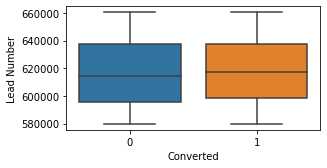

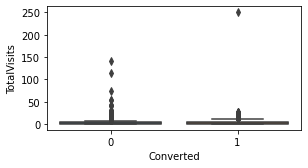

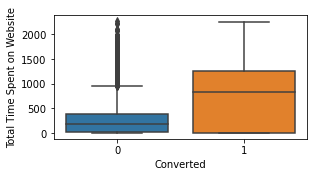

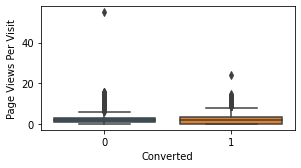

In [58]:
# Bivariate analysis of numerical columns

plt.figure(figsize=(10, 5))
plt.subplot(2,2,1)
sns.boxplot(x='Converted', y='Lead Number', data=df)
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(2,2,2)
sns.boxplot(x='Converted', y='TotalVisits', data=df)
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(2,2,3)
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=df)
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(2,2,4)
sns.boxplot(x='Converted', y='Page Views Per Visit', data=df)
plt.show()

- We need to treat the outliers in the numerical columns by removing the top and bottom 1% of the outlier values.

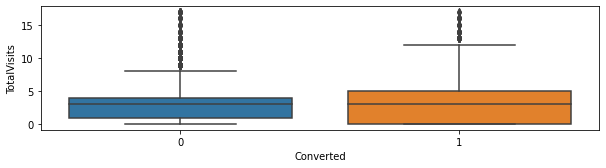

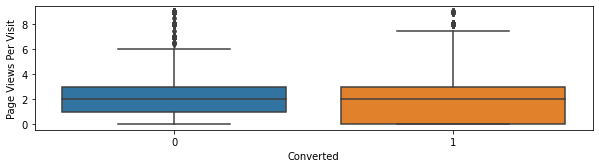

In [59]:
# Outlier treatment

Q3 = df['TotalVisits'].quantile(0.99)
df = df[(df['TotalVisits'] <= Q3)]
Q1 = df['TotalVisits'].quantile(0.01)
df = df[(df['TotalVisits'] >= Q1)]

q3 = df['Page Views Per Visit'].quantile(0.99)
df = df[(df['Page Views Per Visit'] <= q3)]
q1 = df['Page Views Per Visit'].quantile(0.01)
df = df[(df['Page Views Per Visit'] >= q1)]

plt.figure(figsize=(10, 5))
plt.subplot(2,1,1)
sns.boxplot(x='Converted', y='TotalVisits', data=df)
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(2,1,2)
sns.boxplot(x='Converted', y='Page Views Per Visit', data=df)
plt.show()

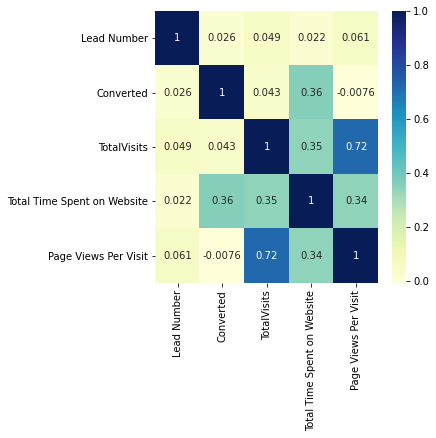

In [60]:
# Plotting the heatmap to visualize the correlation between various numerical columns

plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)
plt.show()

- From the heatmap, it can be inferred that 'TotalVisits' have a strong correlation with 'Page Views Per Visit'.

- Some columns like 'Tags', 'Last Activity', 'Last Notable Activity' and 'Lead Number' are generated by the sales team. So we drop these columns as they can affect our model accuracy.

In [61]:
# Dropping 'Tags', 'Last Activity', 'Last Notable Activity' and 'Lead Number' columns

df.drop(['Tags', 'Last Activity', 'Last Notable Activity', 'Lead Number'], axis=1, inplace=True)

In [62]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Others,Unemployed,Others,No
1,API,Organic Search,No,0,5.0,674,2.5,Others,Unemployed,Others,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Student,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Others,Unemployed,Mumbai,No


In [63]:
df.shape

(9090, 11)

In [64]:
# Checking the percentage of data retained

round((100*df.shape[0]/9240), 2)

98.38

- We have successfully retained 98% of the data.

In [65]:
# Checking null values in the columns

df.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Specialization                            0
What is your current occupation           0
City                                      0
A free copy of Mastering The Interview    0
dtype: int64

### Dummy Variable Creation for Categorical Variables

#### Converting some binary variables (Yes/No) to 0/1

In [66]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to our list

df[varlist] = df[varlist].apply(binary_map)
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Others,Unemployed,Others,0
1,API,Organic Search,0,0,5.0,674,2.5,Others,Unemployed,Others,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,Mumbai,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Others,Unemployed,Mumbai,0


#### Creating dummy features (one-hot encoded) for categorical variables with multiple levels

In [67]:
# Creating a dummy variable for some of the categorical variables and dropping the first one

dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation',
                           'City']], drop_first=True)

# Adding the results to the master dataframe

df = pd.concat([df, dummy1], axis=1)

In [68]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,...,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Others,City_Thane & Outskirts
0,API,Olark Chat,0,0,0.0,0,0.0,Others,Unemployed,Others,...,0,1,0,0,0,0,1,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Others,Unemployed,Others,...,0,1,0,0,0,0,1,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,Mumbai,...,0,0,0,0,0,1,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,...,0,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Others,Unemployed,Mumbai,...,0,1,0,0,0,0,1,0,0,0


In [69]:
# Dropping the variables for which the dummies have been created

df = df.drop(['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation', 'City'], axis=1)

In [70]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Others,City_Thane & Outskirts
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [71]:
df.shape

(9090, 37)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9090 non-null   int64  
 1   Converted                                             9090 non-null   int64  
 2   TotalVisits                                           9090 non-null   float64
 3   Total Time Spent on Website                           9090 non-null   int64  
 4   Page Views Per Visit                                  9090 non-null   float64
 5   A free copy of Mastering The Interview                9090 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9090 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9090 non-null   uint8  
 8   Lead Origin_Lead Import                               9090

### Train-Test Split

In [73]:
# Putting feature variable to X

X = df.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Others,City_Thane & Outskirts
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [74]:
# Putting response variable to y

y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [75]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [76]:
# Normalising the data

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(
    X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Others,City_Thane & Outskirts
302,0,0.411765,0.110035,0.258889,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
6087,1,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1033,0,0.294118,0.206866,0.555556,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
7656,1,0.352941,0.154930,0.666667,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3241,0,0.235294,0.428257,0.147778,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [77]:
# Checking the conversion rate

converted = (sum(df['Converted'])/len(df['Converted'].index))*100
converted

38.448844884488445

- The rate of conversion is about 38%.

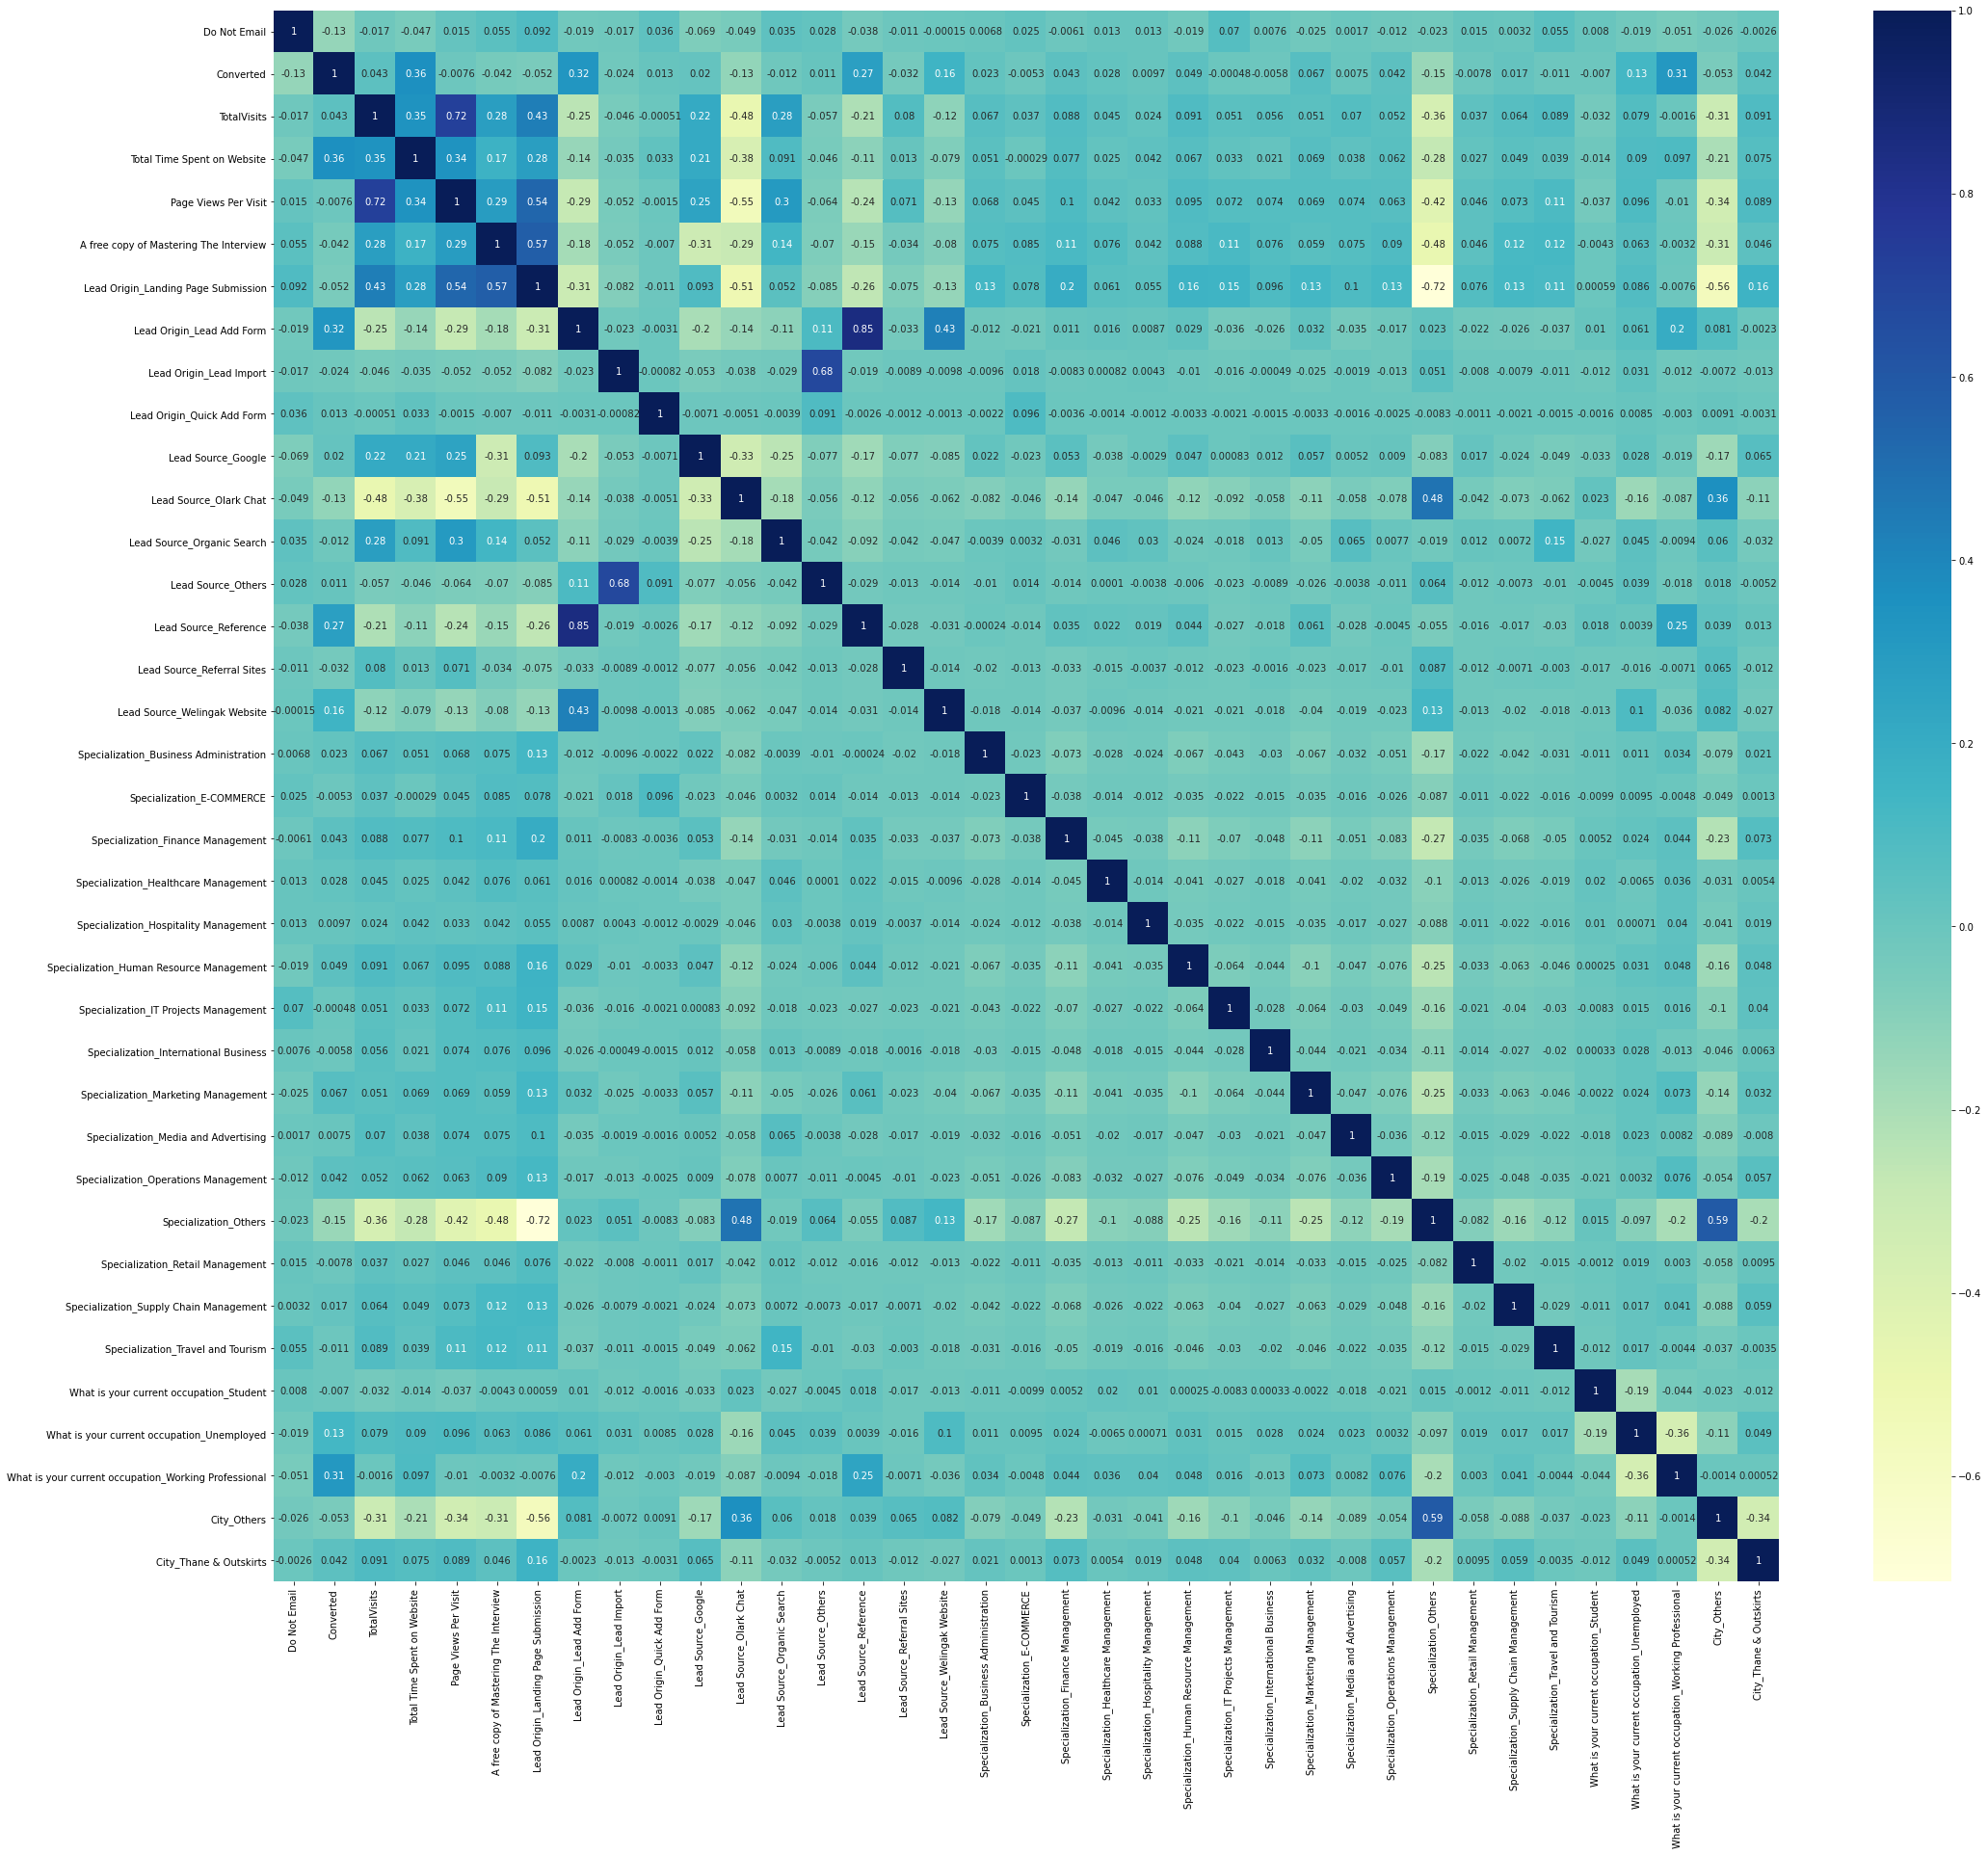

In [78]:
# Checking the correlation matrix

plt.figure(figsize=(35,30))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [79]:
# Dropping highly correlated (r>0.4) dummy variables

X_test = X_test.drop(['Lead Origin_Landing Page Submission','Lead Source_Olark Chat','Lead Source_Others',
                      'Lead Source_Reference','Specialization_Others','City_Others','Lead Origin_Lead Add Form',
                     'Lead Source_Welingak Website'], 1)
X_train = X_train.drop(['Lead Origin_Landing Page Submission','Lead Source_Olark Chat','Lead Source_Others',
                        'Lead Source_Reference','Specialization_Others', 'City_Others','Lead Origin_Lead Add Form',
                       'Lead Source_Welingak Website'], 1)

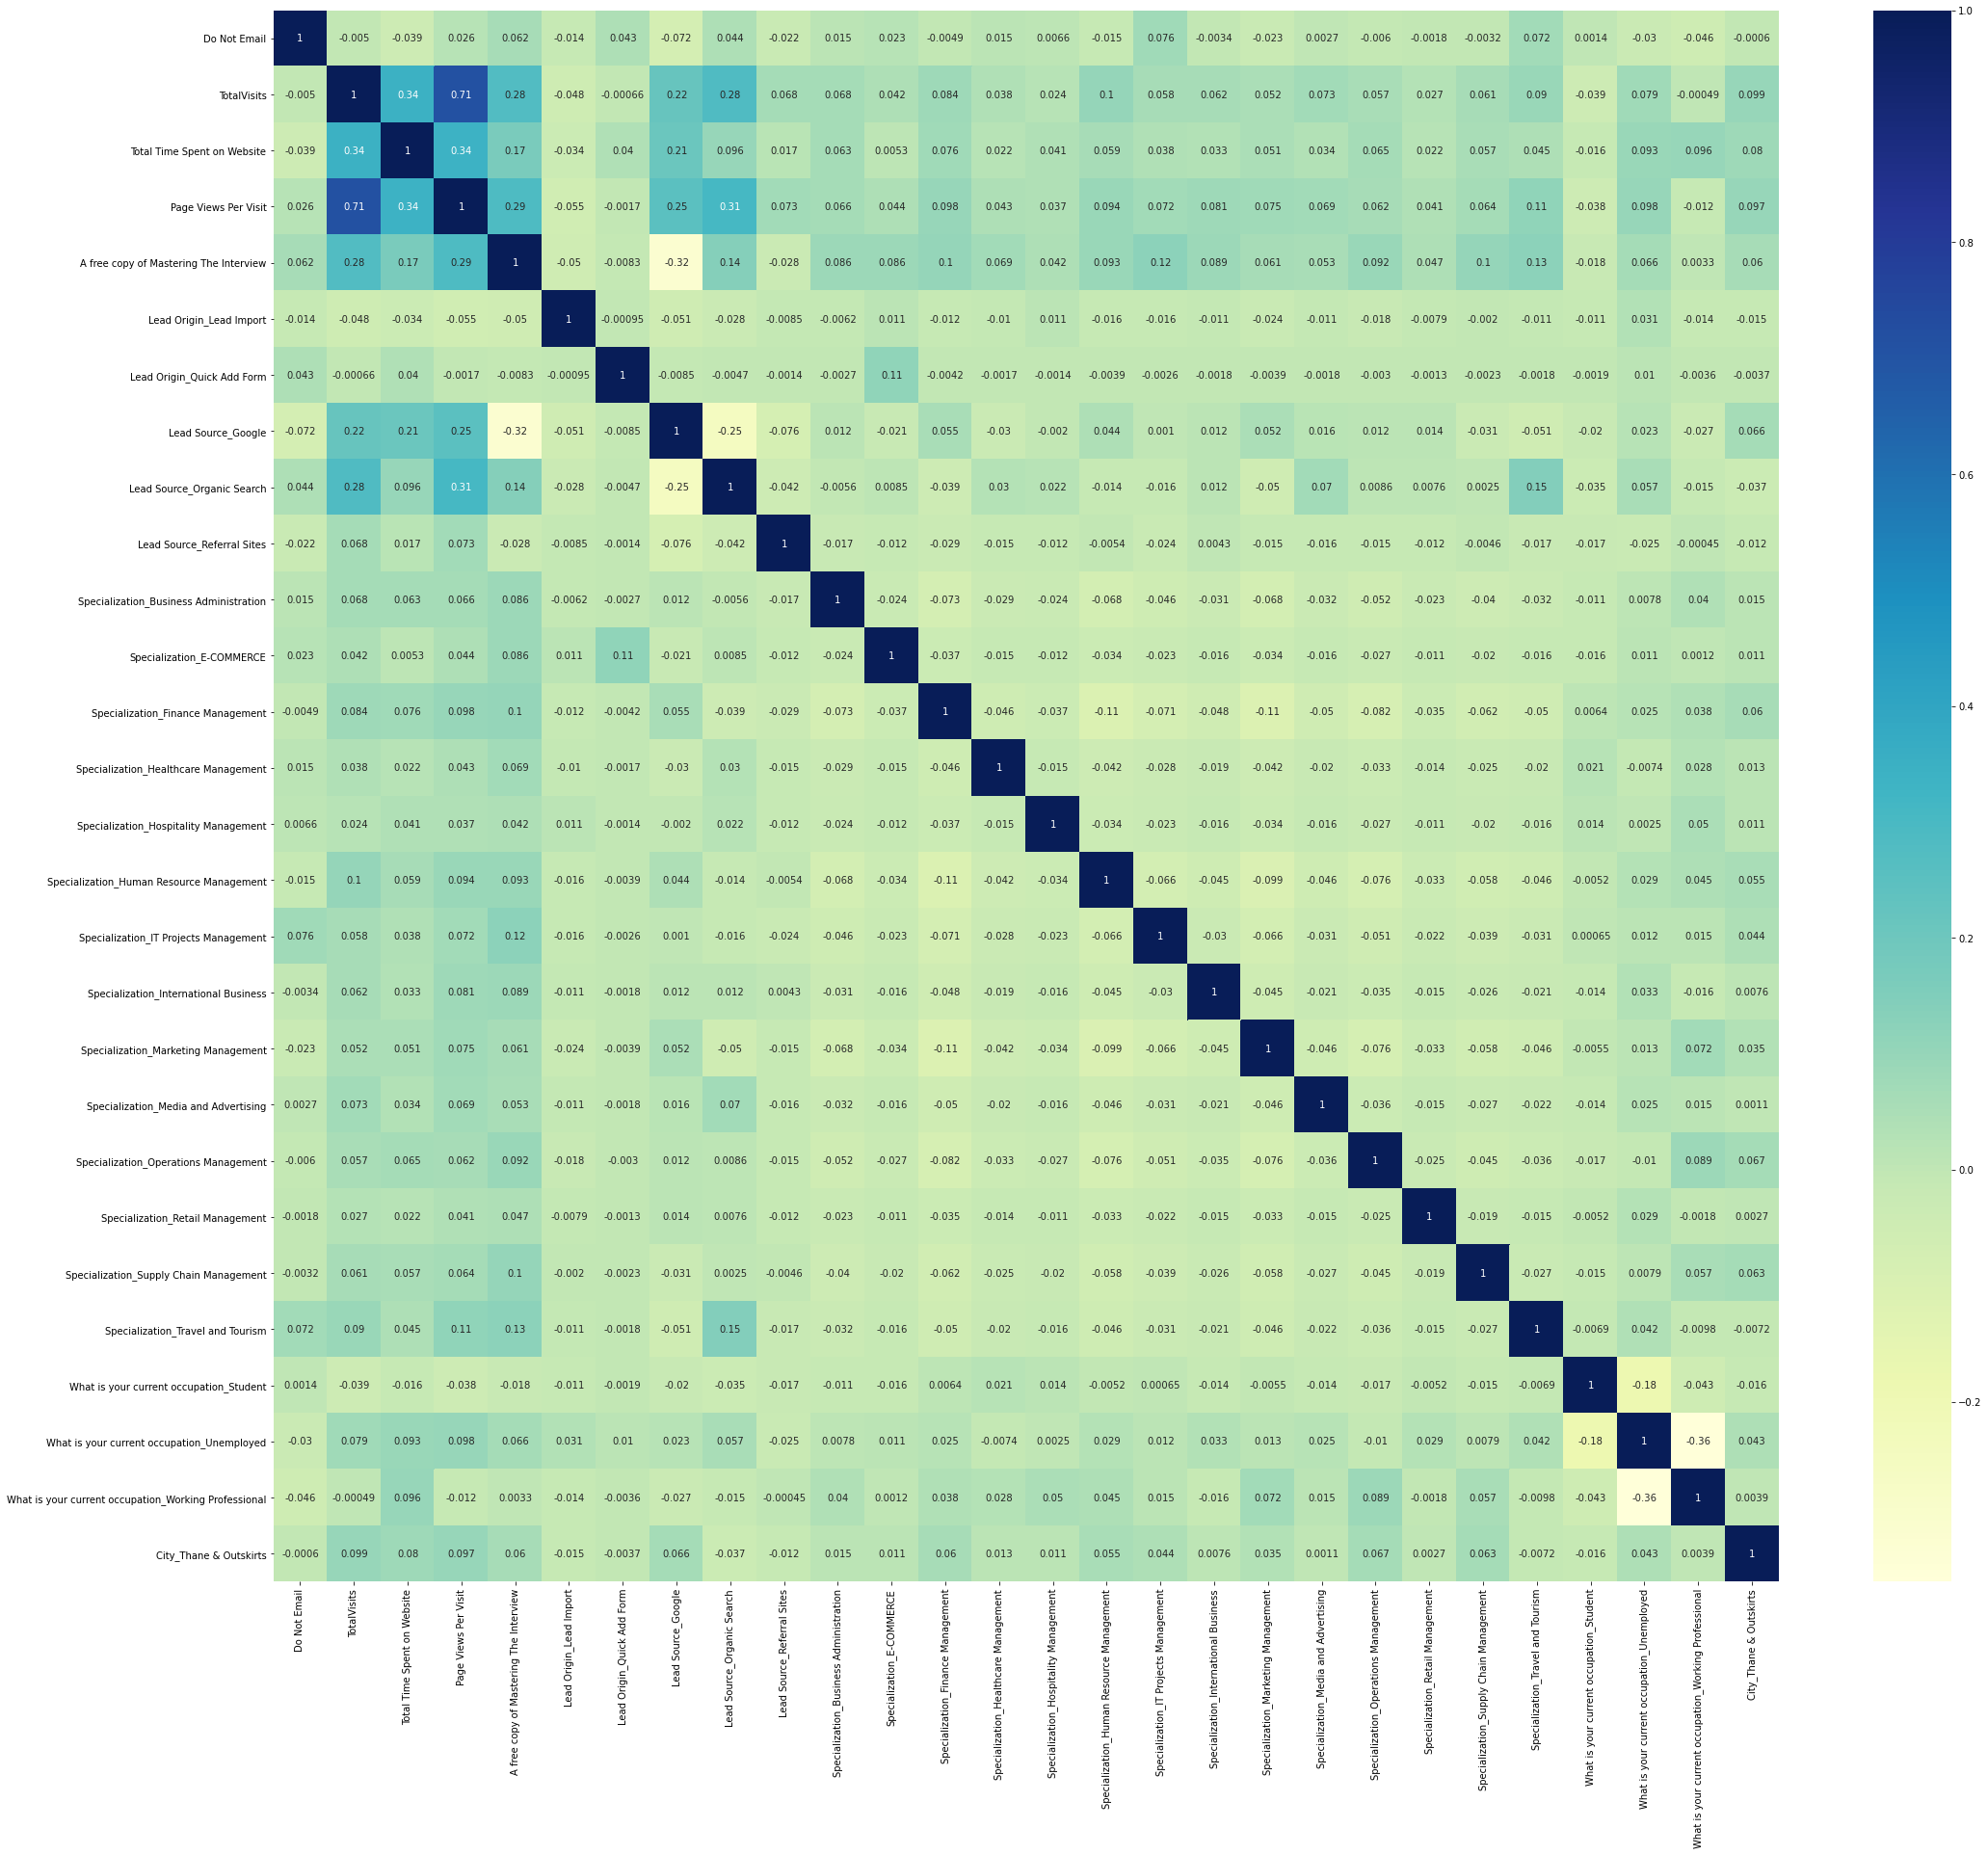

In [80]:
# Further checking the correlation matrix

plt.figure(figsize=(35,30))
sns.heatmap(X_train.corr(), cmap='YlGnBu', annot=True)
plt.show()

## Model Building

In [81]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3123.8
Date:                Wed, 12 Jan 2022   Deviance:                       6247.5
Time:                        18:14:49   Pearson chi2:                 6.36e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9849      0.083    -23.853      0.000      -2.148      -1.822
Do Not Email                                            -1.2468      0.149     -8.388      0.000      -1.538      -0.955
TotalVisits                                              0.7310      0.269      2.719      0.007       0.204       1.258
Total Time Spent on Website                              3.9233      0.152     25.775      0.000       3.625       4.222
Page Views Per Visit                                    -1.6331      0.242     -6.748      0.000      -2.107      -1.159
A free copy of Mastering The Interview                  -0.8677      0.090     -9.608      0.000      -1.045      -0.691
Lead Origin_Lead Import                                 -1.6515      0.515     -3.206      0.001      -2.661      -0.642
Lead Origin_Quick Add Form                              18.1987   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Google                                      -0.6105      0.088     -6.924      0.000      -0.783      -0.438
Lead Source_Organic Search                              -0.3721      0.114     -3.254      0.001      -0.596      -0.148
Lead Source_Referral Sites                              -0.7282      0.315     -2.311      0.021      -1.346      -0.111
Specialization_Business Administration                   0.0920      0.165      0.559      0.576      -0.231       0.415
Specialization_E-COMMERCE                                0.4770      0.306      1.559      0.119      -0.123       1.077
Specialization_Finance Management                        0.2935      0.117      2.511      0.012       0.064       0.523
Specialization_Healthcare Management                     0.4075      0.245      1.660      0.097      -0.074       0.888
Specialization_Hospitality Management                   -0.4087      0.318     -1.287      0.198      -1.031       0.214
Specialization_Human Resource Management                 0.3497      0.122      2.870      0.004       0.111       0.589
Specialization_IT Projects Management                    0.2996      0.171      1.749      0.080      -0.036       0.635
Specialization_International Business                    0.2936      0.228      1.287      0.198      -0.153       0.741
Specialization_Marketing Management                      0.4104      0.120      3.416      0.001       0.175       0.646
Specialization_Media and Advertising                     0.3645      0.224      1.628      0.104      -0.074       0.803
Specialization_Operations Management                     0.2875      0.152      1.894      0.058      -0.010       0.585
Specialization_Retail Management                        -0

### Feature Selection using RFE

In [82]:
logreg = LogisticRegression()

In [83]:
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [84]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True, False, False,  True, False, False, False,
       False, False, False,  True, False, False,  True,  True,  True,
       False])

In [85]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 11),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Specialization_Business Administration', False, 12),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_Finance Management', False, 7),
 ('Specialization_Healthcare Management', False, 3),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 4),
 ('Specialization_IT Projects Management', False, 8),
 ('Specialization_International Business', False, 9),
 ('Specialization_Marketing Management', False, 2),
 ('Specialization_Media and Advertising', False, 5),
 ('Specialization_Operations Management', False, 6),
 ('Specialization_Retail Management

In [86]:
# Assigning columns

col = X_train.columns[rfe.support_]

In [87]:
# Checking the columns not selected by RFE

X_train.columns[~rfe.support_]

Index(['Lead Origin_Quick Add Form', 'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'City_Thane & Outskirts'],
      dtype='object')

#### Assessing the model with StatsModels

In [88]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3137.0
Date:                Wed, 12 Jan 2022   Deviance:                       6274.1
Time:                        18:14:50   Pearson chi2:                 6.35e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9321      0.082    -23.642      0.000      -2.092      -1.772
Do Not Email                                            -1.2331      0.148     -8.351      0.000      -1.523      -0.944
TotalVisits                                              0.8114      0.268      3.027      0.002       0.286       1.337
Total Time Spent on Website                              3.9571      0.152     26.086      0.000       3.660       4.254
Page Views Per Visit                                    -1.4700      0.237     -6.196      0.000      -1.935      -1.005
A free copy of Mastering The Interview                  -0.7496      0.084     -8.949      0.000      -0.914      -0.585
Lead Origin_Lead Import                                 -1.7223      0.521     -3.309      0.001      -2.743      -0.702
Lead Source_Google                                      -0.5750      0.087     -6.590      0.000      -0.746      -0.404
Lead Source_Organic Search                              -0.4584      0.112     -4.092      0.000      -0.678      -0.239
Lead Source_Referral Sites                              -0.8314      0.315     -2.640      0.008      -1.449      -0.214
Specialization_E-COMMERCE                                0.2694      0.300      0.898      0.369      -0.319       0.858
Specialization_Hospitality Management                   -0.6129      0.314     -1.950      0.051      -1.229       0.003
Specialization_Retail Management                        -0.5294      0.315     -1.683      0.092      -1.146       0.087
What is your current occupation_Student                  1.1282      0.205      5.495      0.000       0.726       1.531
What is your current occupation_Unemployed               1.5625      0.080     19.631      0.000       1.406       1.718
What is your current occupation_Working Professional     4.2100      0.184     22.917      0.000       3.850       4.570
========================================================================================================================
"""

In [89]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

302     0.085132
6087    0.040495
1033    0.330916
7656    0.080695
3241    0.633908
5738    0.054397
7366    0.309189
3680    0.072647
4170    0.509073
43      0.063065
dtype: float64

In [90]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0851317 , 0.04049505, 0.33091603, 0.08069487, 0.63390818,
       0.05439689, 0.3091894 , 0.07264674, 0.5090726 , 0.06306531])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [91]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.085132,302
1,0,0.040495,6087
2,0,0.330916,1033
3,0,0.080695,7656
4,1,0.633908,3241


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [92]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.085132,302,0
1,0,0.040495,6087,0
2,0,0.330916,1033,0
3,0,0.080695,7656,0
4,1,0.633908,3241,1


In [93]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3495  440]
 [1117 1311]]


In [94]:
# Predicted     not_converted    converted
# Actual
# not_converted        3495        440
# converted            1117        1311  

In [95]:
# Checking the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7553041018387553


#### Checking VIFs

In [96]:
# Creating a dataframe containing the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train.[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by ="VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,5.67
1,TotalVisits,4.76
6,Lead Source_Google,2.25
2,Total Time Spent on Website,2.19
13,What is your current occupation_Unemployed,2.02
4,A free copy of Mastering The Interview,1.99
7,Lead Source_Organic Search,1.52
14,What is your current occupation_Working Profes...,1.14
0,Do Not Email,1.07
8,Lead Source_Referral Sites,1.05


- 'Specialization_E-COMMERCE' has insignificant p-value. So, we will drop this variable.

In [97]:
# Dropping 'Specialization_E-COMMERCE'

col = col.drop('Specialization_E-COMMERCE', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Specialization_Hospitality Management',
       'Specialization_Retail Management',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [98]:
# Running the model once more using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm3.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3137.4
Date:                Wed, 12 Jan 2022   Deviance:                       6274.9
Time:                        18:14:51   Pearson chi2:                 6.35e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9312      0.082    -23.634      0.000      -2.091      -1.771
Do Not Email                                            -1.2317      0.148     -8.342      0.000      -1.521      -0.942
TotalVisits                                              0.8116      0.268      3.029      0.002       0.286       1.337
Total Time Spent on Website                              3.9536      0.152     26.084      0.000       3.657       4.251
Page Views Per Visit                                    -1.4666      0.237     -6.182      0.000      -1.932      -1.002
A free copy of Mastering The Interview                  -0.7443      0.084     -8.910      0.000      -0.908      -0.581
Lead Origin_Lead Import                                 -1.7154      0.521     -3.293      0.001      -2.737      -0.694
Lead Source_Google                                      -0.5743      0.087     -6.584      0.000      -0.745      -0.403
Lead Source_Organic Search                              -0.4584      0.112     -4.093      0.000      -0.678      -0.239
Lead Source_Referral Sites                              -0.8337      0.315     -2.647      0.008      -1.451      -0.216
Specialization_Hospitality Management                   -0.6167      0.314     -1.962      0.050      -1.233      -0.001
Specialization_Retail Management                        -0.5332      0.315     -1.695      0.090      -1.150       0.083
What is your current occupation_Student                  1.1260      0.205      5.485      0.000       0.724       1.528
What is your current occupation_Unemployed               1.5627      0.080     19.634      0.000       1.407       1.719
What is your current occupation_Working Professional     4.2115      0.184     22.925      0.000       3.851       4.572
========================================================================================================================
"""

In [99]:
y_train_pred = res2.predict(X_train_sm).values.reshape(-1)

In [100]:
y_train_pred[:10]

array([0.08506731, 0.04058394, 0.33158406, 0.08141559, 0.63520591,
       0.05475729, 0.30890567, 0.07309603, 0.51073616, 0.06324964])

In [101]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [102]:
# Creating a new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.085067,302,0
1,0,0.040584,6087,0
2,0,0.331584,1033,0
3,0,0.081416,7656,0
4,1,0.635206,3241,1


In [103]:
# Checking the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7553041018387553


- The accuracy of the model has not dropped. The accuracy is still at 75.5%.

#### Checking the VIFs again

In [104]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,5.67
1,TotalVisits,4.76
6,Lead Source_Google,2.25
2,Total Time Spent on Website,2.19
12,What is your current occupation_Unemployed,2.02
4,A free copy of Mastering The Interview,1.98
7,Lead Source_Organic Search,1.52
13,What is your current occupation_Working Profes...,1.14
0,Do Not Email,1.07
8,Lead Source_Referral Sites,1.05


- 'Specialization_Retail Management' has insignificant p-value. So, we will drop this variable.

In [105]:
# Dropping 'Specialization_Retail Management'

col = col.drop('Specialization_Retail Management', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Specialization_Hospitality Management',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [106]:
# Running the model once more using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res3 = logm4.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3138.9
Date:                Wed, 12 Jan 2022   Deviance:                       6277.8
Time:                        18:14:51   Pearson chi2:                 6.37e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9315      0.082    -23.638      0.000      -2.092      -1.771
Do Not Email                                            -1.2295      0.148     -8.332      0.000      -1.519      -0.940
TotalVisits                                              0.8184      0.268      3.055      0.002       0.293       1.343
Total Time Spent on Website                              3.9484      0.151     26.067      0.000       3.652       4.245
Page Views Per Visit                                    -1.4708      0.237     -6.203      0.000      -1.936      -1.006
A free copy of Mastering The Interview                  -0.7496      0.083     -8.984      0.000      -0.913      -0.586
Lead Origin_Lead Import                                 -1.7114      0.521     -3.286      0.001      -2.732      -0.691
Lead Source_Google                                      -0.5767      0.087     -6.615      0.000      -0.748      -0.406
Lead Source_Organic Search                              -0.4573      0.112     -4.086      0.000      -0.677      -0.238
Lead Source_Referral Sites                              -0.8290      0.315     -2.634      0.008      -1.446      -0.212
Specialization_Hospitality Management                   -0.6092      0.314     -1.939      0.052      -1.225       0.006
What is your current occupation_Student                  1.1261      0.205      5.489      0.000       0.724       1.528
What is your current occupation_Unemployed               1.5596      0.080     19.602      0.000       1.404       1.716
What is your current occupation_Working Professional     4.2076      0.184     22.909      0.000       3.848       4.568
========================================================================================================================
"""

In [107]:
y_train_pred = res3.predict(X_train_sm).values.reshape(-1)

In [108]:
y_train_pred[:10]

array([0.0855014 , 0.04065843, 0.32999606, 0.08083512, 0.63288505,
       0.05445584, 0.30888059, 0.07272821, 0.50794895, 0.06304326])

In [109]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [110]:
# Creating a new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.085501,302,0
1,0,0.040658,6087,0
2,0,0.329996,1033,0
3,0,0.080835,7656,0
4,1,0.632885,3241,1


In [111]:
# Checking the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.754989784692755


- The accuracy of the model dropped insignificantly. The accuracy is still at 75.5%.

#### Checking the VIFs again

In [112]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,5.67
1,TotalVisits,4.76
6,Lead Source_Google,2.25
2,Total Time Spent on Website,2.19
11,What is your current occupation_Unemployed,2.01
4,A free copy of Mastering The Interview,1.97
7,Lead Source_Organic Search,1.52
12,What is your current occupation_Working Profes...,1.14
0,Do Not Email,1.07
8,Lead Source_Referral Sites,1.05


- 'Specialization_Hospitality Management' has insignificant p-value. So, we will drop this variable.

In [113]:
# Dropping 'Specialization_Retail Management'

col = col.drop('Specialization_Hospitality Management', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [114]:
# Running the model once more using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res4 = logm5.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3140.9
Date:                Wed, 12 Jan 2022   Deviance:                       6281.7
Time:                        18:14:52   Pearson chi2:                 6.38e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9297      0.082    -23.628      0.000      -2.090      -1.770
Do Not Email                                            -1.2340      0.148     -8.356      0.000      -1.523      -0.945
TotalVisits                                              0.8244      0.268      3.079      0.002       0.300       1.349
Total Time Spent on Website                              3.9416      0.151     26.039      0.000       3.645       4.238
Page Views Per Visit                                    -1.4756      0.237     -6.224      0.000      -1.940      -1.011
A free copy of Mastering The Interview                  -0.7537      0.083     -9.037      0.000      -0.917      -0.590
Lead Origin_Lead Import                                 -1.7197      0.519     -3.312      0.001      -2.737      -0.702
Lead Source_Google                                      -0.5793      0.087     -6.644      0.000      -0.750      -0.408
Lead Source_Organic Search                              -0.4626      0.112     -4.133      0.000      -0.682      -0.243
Lead Source_Referral Sites                              -0.8245      0.315     -2.621      0.009      -1.441      -0.208
What is your current occupation_Student                  1.1179      0.205      5.458      0.000       0.716       1.519
What is your current occupation_Unemployed               1.5557      0.080     19.568      0.000       1.400       1.711
What is your current occupation_Working Professional     4.1891      0.183     22.877      0.000       3.830       4.548
========================================================================================================================
"""

In [115]:
y_train_pred = res4.predict(X_train_sm).values.reshape(-1)

In [116]:
y_train_pred[:10]

array([0.08603325, 0.04055489, 0.3284475 , 0.0798962 , 0.63093467,
       0.05431769, 0.30750017, 0.072568  , 0.50553619, 0.0629065 ])

In [117]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [118]:
# Creating a new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.086033,302,0
1,0,0.040555,6087,0
2,0,0.328447,1033,0
3,0,0.079896,7656,0
4,1,0.630935,3241,1


In [119]:
# Checking the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7551469432657552


- The accuracy of the model has changed insignificantly. The accuracy is still at 75.5%.

#### Checking the VIFs again

In [120]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,5.67
1,TotalVisits,4.76
6,Lead Source_Google,2.25
2,Total Time Spent on Website,2.19
10,What is your current occupation_Unemployed,2.01
4,A free copy of Mastering The Interview,1.97
7,Lead Source_Organic Search,1.52
11,What is your current occupation_Working Profes...,1.13
0,Do Not Email,1.07
8,Lead Source_Referral Sites,1.05


- 'Page Views Per Visit' has high VIF. So, we will drop this variable.

In [121]:
# Dropping 'Page Views Per Visit'

col = col.drop('Page Views Per Visit', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [122]:
# Running the model once more using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res5 = logm6.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3160.7
Date:                Wed, 12 Jan 2022   Deviance:                       6321.5
Time:                        18:14:52   Pearson chi2:                 6.35e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9747      0.081    -24.243      0.000      -2.134      -1.815
Do Not Email                                            -1.2557      0.147     -8.525      0.000      -1.544      -0.967
TotalVisits                                             -0.1225      0.222     -0.551      0.582      -0.558       0.313
Total Time Spent on Website                              3.8372      0.149     25.688      0.000       3.544       4.130
A free copy of Mastering The Interview                  -0.8527      0.082    -10.447      0.000      -1.013      -0.693
Lead Origin_Lead Import                                 -1.7058      0.520     -3.281      0.001      -2.725      -0.687
Lead Source_Google                                      -0.7228      0.084     -8.595      0.000      -0.888      -0.558
Lead Source_Organic Search                              -0.6211      0.108     -5.747      0.000      -0.833      -0.409
Lead Source_Referral Sites                              -1.0041      0.314     -3.196      0.001      -1.620      -0.388
What is your current occupation_Student                  1.0970      0.205      5.362      0.000       0.696       1.498
What is your current occupation_Unemployed               1.5268      0.079     19.317      0.000       1.372       1.682
What is your current occupation_Working Professional     4.1615      0.183     22.780      0.000       3.803       4.520
========================================================================================================================
"""

- 'TotalVisits' has insignificant p-value. So, we will drop this variable.

In [123]:
# Dropping 'TotalVisits'

col = col.drop('TotalVisits', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [124]:
# Running the model once more using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res6 = logm7.fit()
res6.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3160.9
Date:                Wed, 12 Jan 2022   Deviance:                       6321.8
Time:                        18:14:52   Pearson chi2:                 6.35e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9813      0.081    -24.578      0.000      -2.139      -1.823
Do Not Email                                            -1.2549      0.147     -8.521      0.000      -1.544      -0.966
Total Time Spent on Website                              3.8217      0.147     26.066      0.000       3.534       4.109
A free copy of Mastering The Interview                  -0.8673      0.077    -11.228      0.000      -1.019      -0.716
Lead Origin_Lead Import                                 -1.7064      0.520     -3.281      0.001      -2.726      -0.687
Lead Source_Google                                      -0.7388      0.079     -9.359      0.000      -0.894      -0.584
Lead Source_Organic Search                              -0.6411      0.102     -6.295      0.000      -0.841      -0.441
Lead Source_Referral Sites                              -1.0235      0.312     -3.278      0.001      -1.635      -0.412
What is your current occupation_Student                  1.0978      0.205      5.364      0.000       0.697       1.499
What is your current occupation_Unemployed               1.5259      0.079     19.311      0.000       1.371       1.681
What is your current occupation_Working Professional     4.1625      0.183     22.784      0.000       3.804       4.521
========================================================================================================================
"""

In [125]:
y_train_pred = res6.predict(X_train_sm).values.reshape(-1)

In [126]:
y_train_pred[:10]

array([0.07015755, 0.03782624, 0.40044601, 0.12073544, 0.5778704 ,
       0.05770313, 0.2924574 , 0.06787795, 0.55971977, 0.08733322])

In [127]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [128]:
# Creating a new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.070158,302,0
1,0,0.037826,6087,0
2,0,0.400446,1033,0
3,0,0.120735,7656,0
4,1,0.577870,3241,1


In [129]:
# Checking the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7553041018387553


- The accuracy of the model has changed insignificantly. The accuracy is still at 75.5%.

#### Checking the VIFs again

In [130]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,2.07
8,What is your current occupation_Unemployed,1.93
4,Lead Source_Google,1.62
2,A free copy of Mastering The Interview,1.56
5,Lead Source_Organic Search,1.22
9,What is your current occupation_Working Profes...,1.13
0,Do Not Email,1.06
6,Lead Source_Referral Sites,1.02
7,What is your current occupation_Student,1.02
3,Lead Origin_Lead Import,1.01


- All the variables have a low VIF values (<5) which imply the absence of multicollinearity. Also, the p-values are significant. So we need not drop any more variables and can proceed with making predictions using this model only.

In [131]:
# Calculating the confusion matrix again 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3490,  445],
       [1112, 1316]], dtype=int64)

In [132]:
# Actual/Predicted     not_converted    converted
        # not_converted        3490      445
        # converted            1112      1316 

#### Metrics beyond simply accuracy

In [133]:
TP = confusion[1,1] # true positives 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [134]:
# Calculating the sensitivity of our logistic regression model

TP / float(TP+FN)

0.5420098846787479

In [135]:
# Calculating the specificity of our logistic regression model

TN / float(TN+FP)

0.8869123252858958

In [136]:
# Calculating the false postive rate - predicting converted when target has not converted

print(FP/ float(TN+FP))

0.11308767471410419


In [137]:
# Calculating the postive predictive value

print (TP / float(TP+FP))

0.7473026689381034


In [138]:
# Calculating the negative predictive value

print (TN / float(TN+ FN))

0.7583659278574533


#### Plotting the ROC Curve

##### An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45° diagonal of the ROC space, the less accurate the test.

In [139]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [140]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob,
                                         drop_intermediate = False)

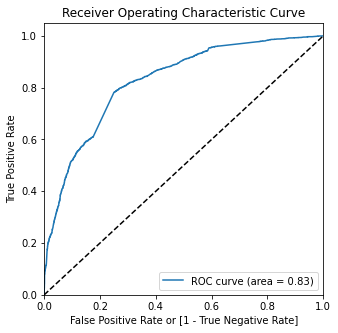

In [141]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Finding Optimal Cutoff Point

- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity.

In [142]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.070158,302,0,1,0,0,0,0,0,0,0,0,0
1,0,0.037826,6087,0,1,0,0,0,0,0,0,0,0,0
2,0,0.400446,1033,0,1,1,1,1,1,0,0,0,0,0
3,0,0.120735,7656,0,1,1,0,0,0,0,0,0,0,0
4,1,0.577870,3241,1,1,1,1,1,1,1,0,0,0,0


In [143]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs

cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.496935  0.984349  0.196188
0.2   0.2  0.635078  0.926277  0.455400
0.3   0.3  0.717115  0.841433  0.640407
0.4   0.4  0.746660  0.602965  0.835324
0.5   0.5  0.755304  0.542010  0.886912
0.6   0.6  0.745875  0.465815  0.918679
0.7   0.7  0.723087  0.364909  0.944091
0.8   0.8  0.696527  0.252471  0.970521
0.9   0.9  0.658337  0.116557  0.992630


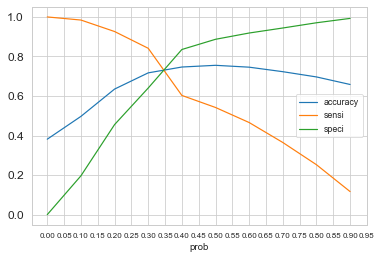

In [144]:
# Plotting the accuracy, sensitivity and specificity for various probabilities

sns.set_style('whitegrid')
sns.set_context('paper')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05), size=8)
plt.yticks(size=12)
plt.show()

- From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [145]:
# Setting the threshold as 0.35

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.070158,302,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.037826,6087,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.400446,1033,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.120735,7656,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.577870,3241,1,1,1,1,1,1,1,0,0,0,0,1


In [146]:
# Checking the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7493320760647494

In [147]:
# Calculating the confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[2816, 1119],
       [ 476, 1952]], dtype=int64)

In [148]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [149]:
# Calculating the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8039538714991763

In [150]:
# Calculating the specificity of our logistic regression model

TN / float(TN+FP)

0.7156289707750954

In [151]:
# Calculating the false postive rate - predicting converted when target has not converted

print(FP/ float(TN+FP))

0.2843710292249047


In [152]:
# Calculating the postive predictive value

print (TP / float(TP+FP))

0.6356235753826115


In [153]:
# Calculating the negative predictive value

print (TN / float(TN+ FN))

0.8554070473876063


#### Precision and Recall

In [154]:
# Calculating the precision of our logistic regression model

TP / float(TP+FP)

0.6356235753826115

In [155]:
# Calculating the recall of our logistic regression model

TP / float(TP+FN)

0.8039538714991763

##### Using sklearn utilities for the same

In [156]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7473026689381034

In [157]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.5420098846787479

##### For our problem, the appropriate metrics that should be used is precision and recall.
- This will help us to identify if the predicted converted has actually converted or not.
- Also, it will give us the probability that an actual converted case has been correctly predicted.

 So, we will use the Precision-Recall trade-off curve to identify the most optimised threshold.

##### Precision and Recall Tradeoff

In [158]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    1
 6360    1
 6361    1
 6362    0
 Name: Converted, Length: 6363, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    1
 6360    1
 6361    1
 6362    0
 Name: predicted, Length: 6363, dtype: int64)

In [159]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

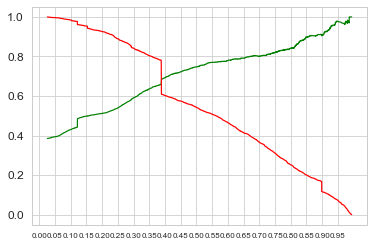

In [160]:
# Plotting the precision-recall curve

sns.set_style('whitegrid')
sns.set_context('paper')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,step=0.05), size=8)
plt.yticks(size=12)
plt.show()

- From the curve above, the precision-recall tradeoff seems to be 0.38. We will use this as the threshold for our test data.

In [161]:
# Setting the updated threshold as 0.38

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.070158,302,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.037826,6087,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.400446,1033,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.120735,7656,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.577870,3241,1,1,1,1,1,1,1,0,0,0,0,1


In [162]:
# Checking the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7601760176017601

In [163]:
# Calculating the confusion matrix again

confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion3

array([[2929, 1006],
       [ 520, 1908]], dtype=int64)

In [164]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [165]:
# Calculating the sensitivity of our logistic regression model

TP / float(TP+FN)

0.785831960461285

In [166]:
# Calculating the specificity of our logistic regression model

TN / float(TN+FP)

0.7443456162642947

In [167]:
# Calculating the false postive rate - predicting converted when target has not converted

print(FP/ float(TN+FP))

0.2556543837357052


In [168]:
# Calculating the postive predictive value

print (TP / float(TP+FP))

0.6547700754975978


In [169]:
# Calculating the negative predictive value

print (TN / float(TN+ FN))

0.8492316613511163


#### Precision and Recall

In [170]:
# Calculating the precision of our logistic regression model

TP / float(TP+FP)

0.6547700754975978

In [171]:
# Calculating the recall of our logistic regression model

TP / float(TP+FN)

0.785831960461285

#### Making Predictions on the Test Set

In [172]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Thane & Outskirts
6906,0,4.0,1530,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1873,0,2.0,186,2.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
771,0,7.0,49,7.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4495,0,4.0,144,4.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9061,0,2.0,1788,2.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [173]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2727 entries, 6906 to 6219
Data columns (total 28 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          2727 non-null   int64  
 1   TotalVisits                                           2727 non-null   float64
 2   Total Time Spent on Website                           2727 non-null   int64  
 3   Page Views Per Visit                                  2727 non-null   float64
 4   A free copy of Mastering The Interview                2727 non-null   int64  
 5   Lead Origin_Lead Import                               2727 non-null   uint8  
 6   Lead Origin_Quick Add Form                            2727 non-null   uint8  
 7   Lead Source_Google                                    2727 non-null   uint8  
 8   Lead Source_Organic Search                            2

In [174]:
# Scaling the test set

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(
    X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [175]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
6906,0,0.673415,0,0,0,0,0,0,1,0
1873,0,0.081866,0,0,1,0,0,0,1,0
771,0,0.021567,0,0,1,0,0,0,1,0
4495,0,0.063380,1,0,1,0,0,0,1,0
9061,0,0.786972,1,0,0,0,0,0,0,0


In [176]:
X_test_sm = sm.add_constant(X_test)

In [177]:
# Making predictions on the test set

y_test_pred = res6.predict(X_test_sm)

In [178]:
y_test_pred[:10]

6906    0.892662
1873    0.292904
771     0.247541
4495    0.139526
9061    0.539686
4929    0.454488
2308    0.096690
1034    0.236738
9033    0.246290
7008    0.797987
dtype: float64

In [179]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [180]:
y_pred_1.head()

,0
6906,0.892662
1873,0.292904
771,0.247541
4495,0.139526
9061,0.539686


In [181]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [182]:
# Putting 'Prospect ID' to index

y_test_df['Prospect ID'] = y_test_df.index

In [183]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [184]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [185]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,6906,0.892662
1,0,1873,0.292904
2,0,771,0.247541
3,0,4495,0.139526
4,1,9061,0.539686


In [186]:
# Renaming the column having label as 0

y_pred_final = y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,1,6906,0.892662
1,0,1873,0.292904
2,0,771,0.247541
3,0,4495,0.139526
4,1,9061,0.539686


In [187]:
# Using the threshold of 0.38 which we got from Precision-Recall Curve

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob,final_predicted
0,1,6906,0.892662,1
1,0,1873,0.292904,0
2,0,771,0.247541,0
3,0,4495,0.139526,0
4,1,9061,0.539686,1


In [188]:
# Calculating the overall model accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7642097543087643

In [189]:
final_confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
final_confusion

array([[1249,  411],
       [ 232,  835]], dtype=int64)

In [190]:
TP = final_confusion[1,1] # true positive 
TN = final_confusion[0,0] # true negatives
FP = final_confusion[0,1] # false positives
FN = final_confusion[1,0] # false negatives

In [191]:
# Calculating the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7825679475164011

In [192]:
# Calculating the specificity of our logistic regression model

TN / float(TN+FP)

0.7524096385542168

In [193]:
# Calculating the precision of our logistic regression model

TP / float(TP+FP)

0.6701444622792937

In [194]:
# Calculating the recall of our logistic regression model

TP / float(TP+FN)

0.7825679475164011

In [195]:
# Plotting the ROC Curve

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [196]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Converted, y_pred_final.Converted_Prob, drop_intermediate = False)

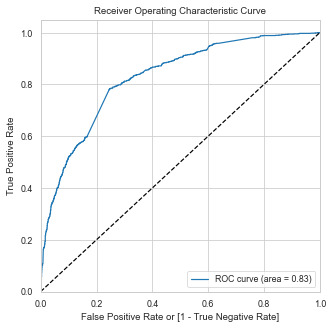

In [197]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_Prob)

##### Generating the Score Variable

In [198]:
y_pred_final

,Converted,Prospect ID,Converted_Prob,final_predicted
0,1,6906,0.892662,1
1,0,1873,0.292904,0
2,0,771,0.247541,0
3,0,4495,0.139526,0
4,1,9061,0.539686,1
...,...,...,...,...
2722,0,1939,0.607337,1
2723,1,1540,0.560549,1
2724,1,5198,0.105871,0
2725,0,8660,0.121185,0


In [199]:
y_pred_final['lead_score'] = (y_pred_final['Converted_Prob'] *100).astype('int64')
y_pred_final.sort_values(by='lead_score', ascending=False)

,Converted,Prospect ID,Converted_Prob,final_predicted,lead_score
1601,1,3428,0.990197,1,99
2662,1,3478,0.993432,1,99
1651,1,7167,0.990099,1,99
842,1,7420,0.990113,1,99
2632,1,5019,0.990106,1,99
...,...,...,...,...,...
1816,0,8947,0.019679,0,1
170,0,6734,0.019009,0,1
2673,0,4716,0.012542,0,1
2079,0,8586,0.015380,0,1


- The leads having lead score between 90 and 100 have a very high chance of getting converted. So, we can term them as hot leads.
- Similarly, leads with lead score of 40 and above are warm leads as they too have a fairly high chance of getting converted.

##### Comparing the Train and Test metrics (considering the threshold of 0.38 obained from the Precision-Recall Curve):

- Train Data
1. Accuracy = 76.02%
2. Sensitivity = 78.58% 
3. Specificity = 74.44%
4. Precision = 65.48%
5. Recall = 78.58%
- Test Data
1. Accuracy = 76.42%
2. Sensitivity = 78.26%
3. Specificity = 75.24%
4. Precision = 67.02%
5. Recall = 78.26%

Hence the model seems to predict the conversion rate pretty well. This can give confidence for business calls.

##### Top Predictors

In [200]:
# Retrieving the parameters from the final model

pd.options.display.float_format = '{:.2f}'.format
final_params = res6.params[1:]
final_params

Do Not Email                                           -1.25
Total Time Spent on Website                             3.82
A free copy of Mastering The Interview                 -0.87
Lead Origin_Lead Import                                -1.71
Lead Source_Google                                     -0.74
Lead Source_Organic Search                             -0.64
Lead Source_Referral Sites                             -1.02
What is your current occupation_Student                 1.10
What is your current occupation_Unemployed              1.53
What is your current occupation_Working Professional    4.16
dtype: float64

In [201]:
final_parameters = pd.DataFrame({'Predictors':['Do Not Email','Total Time Spent on Website',
                        'A free copy of Mastering The Interview','Lead Origin_Lead Import','Lead Source_Google',
                        'Lead Source_Organic Search','Lead Source_Referral Sites','What is your current occupation_Student',
                        'What is your current occupation_Unemployed','What is your current occupation_Working Professional'],
                                 'Coefficient':[-1.25,3.82,-0.87,-1.71,-0.74,-0.64,-1.02,1.10,1.53,4.16]})
final_parameters

,Predictors,Coefficient
0,Do Not Email,-1.25
1,Total Time Spent on Website,3.82
2,A free copy of Mastering The Interview,-0.87
3,Lead Origin_Lead Import,-1.71
4,Lead Source_Google,-0.74
5,Lead Source_Organic Search,-0.64
6,Lead Source_Referral Sites,-1.02
7,What is your current occupation_Student,1.10
8,What is your current occupation_Unemployed,1.53
9,What is your current occupation_Working Profes...,4.16


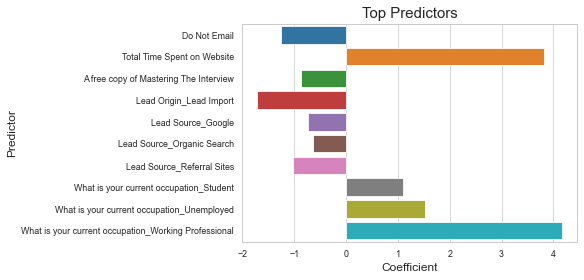

In [202]:
ax = sns.barplot(x='Coefficient', y='Predictors', data=final_parameters)
ax.set_xlabel('Coefficient', fontsize=12)
ax.set_ylabel('Predictor', fontsize=12)
ax.set_title('Top Predictors', fontsize=15)
ax
plt.show()

##### The top 3 features that highly contribute towards the probability of getting a lead converted are as follows :
- What is your current occupation_Working Professional
- Total Time Spent on Website
- Lead Origin_Lead Import